# Projeto 3 - Ciência dos Dados

# Ciência dos Dados 2019

### Alunos:
- Felipe Junqueira
- Giovana Campedelli
- Gabriela Choichit
- João Roxo

### Link para base de dados:

- https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame
- https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952

A partir da base de dados coletada vamos usar a biblioteca ''scikit-learn'' para assim usufruir da técnica Decision Trees para classificação, no caso do jogo da velha: o resultado do jogo, e no caso da fertilidade: ver se a fertilidade esta alterada ou não. 

Feita a primeira análise vamos utilizar de outros algorítimos para classifica-los novamente e assim comparar os resultados obtidos.

Finalmente obteremos o resultado previsto e o melhor algoritmo para prever o resultado.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import  export_graphviz

from IPython.display import Image

from sklearn.externals.six import StringIO

import pydot
import pydotplus

## Iniciando o processo de análise:
Para começar nossa avalição separamos a base de dados em uma variável. feito isso comprovamos que os valores não eram exatamente números, mas sim qual peça (X,O) estava em qual posição do jogo da velha, como nossa análise precisa que sejam números os valores que estejam nas colunas usamos a funçaõ "dummify" para modificar nossa tabela.

Ao ususfruir da função criamos uma nova tabela com o triplo de colunas para avaliar se em uma posiçao específica havia determinada peça. Se a peça está na posição indicada é sinalizado com o valor 1, caso contrario é sinalizado com um 0.



In [3]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [4]:
x= ['top-left','top-middle','top-right','middle-left','middle-middle','middle-right','bottom-left','bottom-middle','bottom-right','class']


dados_velha = pd.read_excel('tic-tac-toe.xlsx', header=None, names=x)
dados_velha.head()

,top-left,top-middle,top-right,middle-left,middle-middle,middle-right,bottom-left,bottom-middle,bottom-right,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [5]:
feature_cols = ['top-left','top-middle','top-right','middle-left','middle-middle','middle-right','bottom-left','bottom-middle','bottom-right']
X = dados_velha[feature_cols] #features
y = dados_velha['class']

In [6]:
dv = X.copy()

In [7]:
for f in feature_cols:
    dv = dummify(dv, f)

In [8]:
dv.head()

,top-left_b,top-left_o,top-left_x,top-middle_b,top-middle_o,top-middle_x,top-right_b,top-right_o,top-right_x,middle-left_b,...,middle-right_x,bottom-left_b,bottom-left_o,bottom-left_x,bottom-middle_b,bottom-middle_o,bottom-middle_x,bottom-right_b,bottom-right_o,bottom-right_x
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [9]:
#Separa os X e Y de teste 
X_train, X_test, y_train, y_test = train_test_split(dv, y, test_size=0.25, random_state=1) # 75% training and 25% 

In [10]:
clf = RandomForestClassifier(n_estimators = 1000, max_depth = 8, 
                             random_state = 0)

In [11]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
#Probabilidade para 1 pergunta (ou seja, quando apenas um espaço do tabuleiro está preenchido)
#Probabilidade para 1 pergunta (1 casa do tabuleiro preenchido)
clf.predict(X_test.iloc[0].values.reshape(1, -1))
#Probabilidade maxima de perguntas 
clf.predict(X_test[0:2])

array(['positive', 'negative'], dtype=object)

In [13]:
#Score vai nos dar a acuracia de nossa predição
score = clf.score(X_test, y_test)
print(score)

0.9875


In [14]:
#Lista de valores referentes a cada pergunta da tree (max_depth):
max_depth_range = list(range(1, 10))

accuracy = []
for depth in max_depth_range:
    
    clf = RandomForestClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)
accuracy

C:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in vers

[0.6458333333333334,
 0.6458333333333334,
 0.6958333333333333,
 0.8166666666666667,
 0.8541666666666666,
 0.8625,
 0.9208333333333333,
 0.9416666666666667,
 0.9291666666666667]

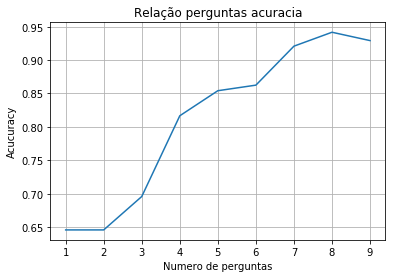

In [15]:
plt.plot(max_depth_range, accuracy)
plt.xlabel('Numero de perguntas')
plt.ylabel('Acucuracy')
plt.title('Relação perguntas acuracia')
plt.grid(True)
plt.show()